### Описание проекта.

Проект состоит из двух частей:
- В первой части мы будет работать со списком гипотез. Необходимо приоритезировать гипотезы по фреймворкам ICE и RICE.

- Во второй части нам предстоит проанализировать A/B-тест, посчитать кумулятивные значения, проверить аномалии, провести тесты на статистическую значимость по сырым и по очищенным данным, сделать решение о приостановке или продолжении эксперимента.

### Описание данных

Файл /datasets/hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [3]:
link = 'ваш_путь_к_файлу'

hypothesis = pd.read_csv(link + 'hypothesis.csv')
orders = pd.read_csv(link +'orders.csv')
visitors = pd.read_csv(link + 'visitors.csv')

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

### Вывод
В таблицах с заказами и количеством посетителей нет пропусков, столбцы с датами нужно привести к типу datetime.


## Часть 1.

### Приоритизация гипотез.

Посчитаем критерии **ICE** и **RICE**.

In [8]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)

hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [9]:
hypothesis[['Hypothesis', 'Impact', 'Confidence', 'Efforts', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,1,1.0


In [10]:
hypothesis[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


In [11]:
pd.reset_option('^display.', silent=True)

### Вывод по первой части.

В критериях **ICE** и **RICE** первые 5 строчек занимают одни и теже гипотезы, но их порядок изменился.

После применения критерия **RICE** приоритет гипотез изменился в следующем направление по сравнению с криетрием **ICE**:

- Гипотеза 8 опустилась с первой строчки на пятую, т.к охват трафика у нее равен 1
- Гипотеза 0 опустилась со второй на третью строчку, хоть коэф. влияния  у нее масимальный, но охват аудитории небольшой
- Первые две строчки заняли гипотезы 7 и 2 - гипотезы с максимальным коэф. охвата 10 и 8
- Гипотеза 6 осталась на четвертом месте, так же как и в критерии **ICE**

## Часть 2.

### Анализ A/B-теста

In [12]:
#приведем столбцы с датой к типу datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Для группы А и В рассчитаем количество пользователей по дням, а такя же кумулятивное значение пользователей по дням.

In [13]:
#группа А
visitors_a = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a.columns = ['date', 'visitorsPerDateA']
visitors_a['visitorsCummulativeA'] = visitors_a['visitorsPerDateA'].cumsum()

#группа В
visitors_b = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b.columns = ['date', 'visitorsPerDateB']
visitors_b['visitorsCummulativeB'] = visitors_b['visitorsPerDateB'].cumsum()

display(visitors_a.head(3))
display(visitors_b.head(3))

,date,visitorsPerDateA,visitorsCummulativeA
0,2019-08-01,719,719
1,2019-08-02,619,1338
2,2019-08-03,507,1845


,date,visitorsPerDateB,visitorsCummulativeB
31,2019-08-01,713,713
32,2019-08-02,581,1294
33,2019-08-03,509,1803


Для групп А и В посчитаем по дням количество заказов и выручку, а также их кумулятивные значения.

In [14]:
#переименуем столбы transactionId и visitorId для удобства
orders = orders.rename(columns={'transactionId':'orderId', 'visitorId':'userId'})

#группа А
orders_a = (orders[orders['group']=='A'][['date', 'orderId', 'userId', 'revenue']]
                                        .groupby('date', as_index=False)
                                        .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
           )
orders_a.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

orders_a['ordersCummulativeA'] = orders_a['ordersPerDateA'].cumsum()
orders_a['revenueCummulativeA'] = orders_a['revenuePerDateA'].cumsum()

#группа В
orders_b = (orders[orders['group']=='B'][['date', 'orderId', 'userId', 'revenue']]
                                        .groupby('date', as_index=False)
                                        .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
           )

orders_b.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

orders_b['ordersCummulativeB'] = orders_b['ordersPerDateB'].cumsum()
orders_b['revenueCummulativeB'] = orders_b['revenuePerDateB'].cumsum()

display(orders_a.head(3))
display(orders_b.head(3))

,date,ordersPerDateA,revenuePerDateA,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579,24,148579
1,2019-08-02,20,93822,44,242401
2,2019-08-03,24,112473,68,354874


,date,ordersPerDateB,revenuePerDateB,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217,21,101217
1,2019-08-02,24,165531,45,266748
2,2019-08-03,16,114248,61,380996


Объединим полученные выше данные в одну таблицу.

In [15]:
#для объединения поставим в индекс дату для всех полученных датафремов
dfs = [df.set_index('date') for df in [visitors_a, visitors_b, orders_a, orders_b]]
#объединим данные и сбросим индекс
data = pd.concat(dfs, axis=1).reset_index()
data.head(3)

,date,visitorsPerDateA,visitorsCummulativeA,visitorsPerDateB,visitorsCummulativeB,ordersPerDateA,revenuePerDateA,ordersCummulativeA,revenueCummulativeA,ordersPerDateB,revenuePerDateB,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,719,719,713,713,24,148579,24,148579,21,101217,21,101217
1,2019-08-02,619,1338,581,1294,20,93822,44,242401,24,165531,45,266748
2,2019-08-03,507,1845,509,1803,24,112473,68,354874,16,114248,61,380996


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

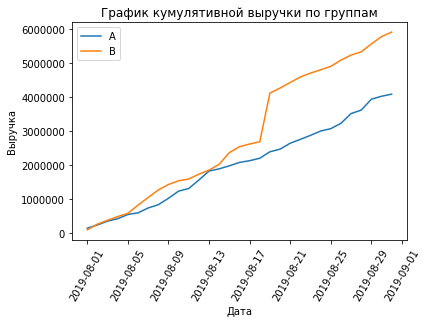

In [16]:
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=60)
plt.legend()
plt.show()

Выручка растет в течении всего теста. С переменным успехом группа В показывает небольшой рост, но на 17 день видим резкий рост выручки в группе В, это может сигнализировать о всплеске числа заказов либо либо о пояявлении очень дорогих заказов в группе В.


Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

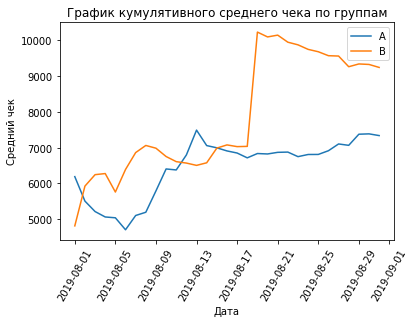

In [17]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=60)

plt.legend()
plt.show()

В группе А средний чек начинает стиблизироватся с 13 числа. Тогда как в группе В 17 числа видим резкий рост и медленное падение до конца теста.

Построим график относительного различия для среднего чека. 

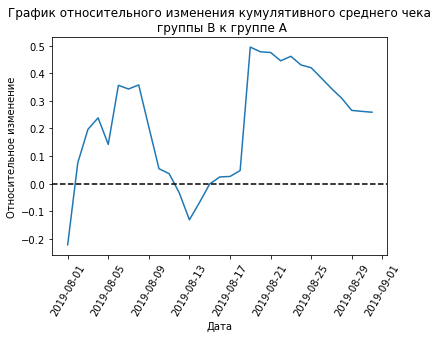

In [18]:
# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека\n группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=60)
plt.show()


В нескольких точках график сильно скачет. Надо искать выбросы.

Аналогично проанализируем график кумулятивной конверсии.

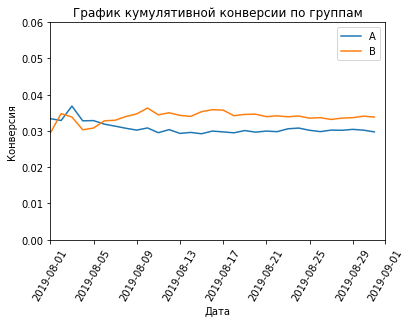

In [19]:
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.06])
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=60)
plt.show()

После небольших скачков в начале конверсия групп А и В стабилизировались, группа В показывает лучшие результаты.

Построим график относительного различия кумулятивных конверсий:

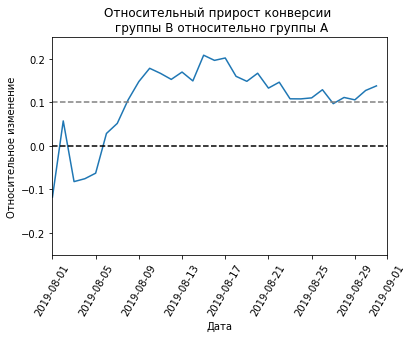

In [20]:
plt.plot(data['date'], (data['ordersCummulativeB']/data['visitorsCummulativeB']) / (data['ordersCummulativeA']/data['visitorsCummulativeA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.25, 0.25])

plt.title("Относительный прирост конверсии \n группы B относительно группы A")
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=60)
plt.show()

С 5 числа группа В резко вырывается вперед и держит свое превосходство в 10% или больше на всем протяжении теста. 

### Вывод. 

Группа В показывает явно лучше результаты по конверсии. Анализ среднего чека показал наличие выбросов, которые надо найти.

### Анализ выбросов

Изучим гистограмму распределения стоимостей заказов:

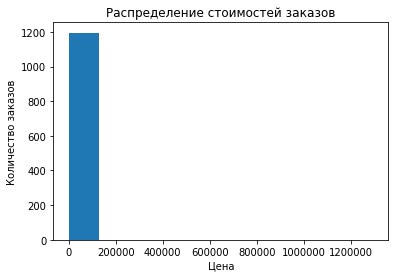

In [21]:
plt.hist(orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel('Цена')
plt.ylabel('Количество заказов')
plt.show()

Где-то явно есть очень крупные заказы.
Построим точечный график стоиместей заказов.

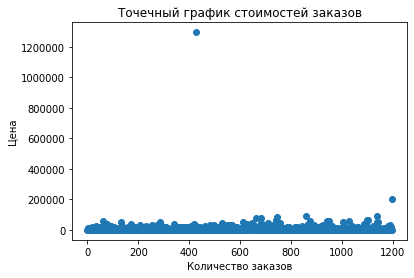

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Цена')
plt.show()

Есть два аномально дорогих заказов больше 200000 рублей.
Рассчитаем 90 и 95 перцентиль заказов

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [24]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(5)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Есть пользователи совершившие  от 5 до 11 заказов. Построим гистограмму распределения заказов на одного пользователя.

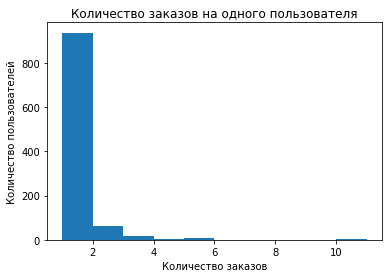

In [25]:
plt.hist(ordersByUsers['orders'])
plt.title('Количество заказов на одного пользователя')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.show()

Большая часть пользователей заказывала 1 раз, однако количество людей с 2 и 3 заказами тоже значительна.

Построим точечную диаграмму числа заказов на одного пользователя:

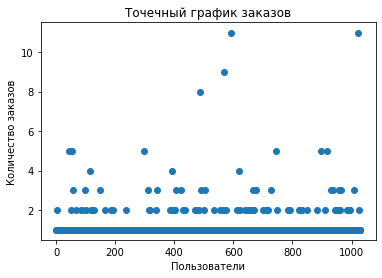

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

Много пользователей с 2 и 3 заказами, посчитаем перцентили.

In [27]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей сделали больше 2 заказов. И 10% пользователей заказывали более 4 раз.

### Вывод
За нижнюю границу стоимости заказов возьмем 60 000р, а нижняя границу заказов на одного пользователя выберем в количестве 3 штук. Так мы уберем 1% пользователей с аномально высокими заказами и от 1 до 5% пользователей с аномальным количеством заказов.

### Статистическая значимость по сырым данным

Рассчитаем статистическую значимость различий в конверсии между группами.

In [28]:
ordersByUsersA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Для определения критерия для проверки стат. значимости. Проверим наши распределения на нормальность с помощью критерия Шапиро-Уилка.
зададим нулевую и альтернативную ей гипотезы:
- H0  - расределение нормально
- H1  - распределение ненормально.

In [29]:
print(stats.shapiro(ordersByUsersA.iloc[:, 1])[1])
print(stats.shapiro(ordersByUsersB.iloc[:, 1])[1])

2.323212724004114e-41
6.58610278232664e-44


Значение p-value в наших выборках намнго меньше 0.05 - это значит, что мы отвергаем нулевую гипотезу, распредления ненормальны.

Применим U-критерий Манна — Уитни для наших выборок и выведем значение p-value на экран.   
Критерий Манна — Уитни позволяет оценить стат. значимость в ненормальных распределениях используя ранговую систему. Для этого добавим в наши выборки всех польхователей не сделавших заказы со значением 0.  
Так же выведем относительный прирост конверсии группы B.   
Зададим уровень статистической значимости 0.05 и сформируем нулевую и альтернативную ей гипотезы:

- H0 - Конверсия  по сырым данным по группе А равна конверсии по группе В.
- H1 - Конверсия по сырым данным по группе А не равна конверсии по группе В. 

In [30]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [31]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Значение p-value 0.008 меньше уровня статистической значимости, это значит что мы отвергаем нулевую гипотезу.   
Различия по сырым данным в группах есть: относительный выигрыш группы B 13.8%

Аналогично рассчитаем статистическую значимость различий в среднем чеке заказа между группами.  

Зададим уровень статистической значимости 0.05 и сформируем нулевую и альтернативную ей гипотезы:

- H0 - Средний чек по сырым данным по группе А равен среднему чеку по группе В.
- H1 - Средний чек по сырым данным по группе А не равен среднему чеку по группе В. 

In [32]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Статистическая значимость по очищенным данным

Найдем аномальных пользователей.

In [33]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: userId, dtype: int64
(14,)


Всего 14 пользователей. 
Посчитаем статистическую значимость конверсии без этих пользователей, применив критерий Манна-Уитни.

Зададим уровень статистической значимости 0.05 и сформируем нулевую и альтернативную ей гипотезы:

- H0 - Конверсия  по очищенным данным по группе А равна конверсии по группе В.
- H1 - Конверсия по очищенным данным по группе А не равна конверсии по группе В. 

In [34]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [35]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.155


Значение p-value 0.008 меньше уровня статистической значимости, это значит что мы отвергаем нулевую гипотезу.   
Также значение p-value практически не изменилось по сравнению с тестом по сырым данным. Но немного вырос относительный выигрыш группы B - 15.5%

Посмотрим как изменились результаты по среднему чеку.
Зададим уровень статистической значимости 0.05 и сформируем нулевую и альтернативную ей гипотезы:

- H0 - Средний чек по оцищенным данным по группе А равен среднему чеку по группе В.
- H1 - Средний чек по оцищенным данным по группе А не равен среднему чеку по группе В. 

In [36]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.407
0.007


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке по очищенным данным есть различия, нет. 

Разница между сегментами сократилась пратически до 0%.

### Вывод по второй части.

Имеющиеся факты:

- Есть статистически значимое различие по конверсии между группами  по «сырым» и по данным после фильтрации аномалий; После фильтрации аномалий заметен рост конверсии на 2% по сравнению с сырыми данными.

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий; После фильтрации аномалий разница между сегментами сократилась пратически до 0%.

Исходя из фактов выше следует оставиновить эксперимент и признать его успешным. Хоть мы и не получили разницу в среднем чеке, но конверсия увеличилась более чем на 10%, а это значит, что получим больше заказов и увеличим выручку.


## Общий вывод

В первой части проекта была произведена приоритизация гипотез по фреймворкам ICE и RICE.  
- Наиболее важные гипотезы для выполнения по ICE : 8, 0, 6, 7, 2.  
- Если для компании важен охват пользователей, то лучше выполнить проверку гипотез по RICE в следующем порядке: 7, 2, 0, 6, 8.

Во второй части проекта мы анализировали результаты А/В-теста продлившегося 31 день.  
Для групп А и В мы проанализировали кумулятивную выручку, средний чек и конверсию: сравнили их статистическое различие по сырым и по очищенным от выбросов данным.

Анализ кумулятивной выручки и среднего чека показал наличие выбросов в группе В, в группе А средней чек начал стабилизироваться с 13 дня теста. Статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий нет; После фильтрации аномалий разница между сегментами сократилась пратически до 0%.

График кумулятивной конверсии показал стабилизацию на 10 день теста, группа В показала рост конверсии более чем на 10% практически на всем протяжении теста. Анализ показал статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий; После фильтрации аномалий заметен рост конверсии на 2% по сравнению с сырыми данными.

Исходя из фактов выше следует оставиновить эксперимент и признать его успешным. Хоть мы и не получили разницу в среднем чеке, но конверсия увеличилась более чем на 10%, а это значит, что получим больше заказов и увеличим выручку.